In [59]:
!pip install gymnasium matplotlib numpy

In [60]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import random

In [61]:
# ASSIGNMENT 3 - PART 1
# Defining a grid scenario and building the RL environment

class YavarEnv(gym.Env):
    def __init__(self):
        self.grid_size = (6, 4)
        self.observation_space = gym.spaces.Discrete(24)  # 24 states in a 6x4 grid
        self.action_space = gym.spaces.Discrete(4)  # 4 actions: Up, Down, Left, Right
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 3]
        self.max_timesteps = MAX_TIMESTEPS

    def reset(self, **kwargs):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.state = np.zeros(self.grid_size)
        self.state[tuple(self.agent_pos)] = 1
        info = {}
        return self.state.flatten(), info

    def step(self, action):
        if action == 0:  # Up
            self.agent_pos[0] = max(0, self.agent_pos[0] - 1)
        elif action == 1:  # Down
            self.agent_pos[0] = min(self.grid_size[0] - 1, self.agent_pos[0] + 1)
        elif action == 2:  # Left
            self.agent_pos[1] = max(0, self.agent_pos[1] - 1)
        elif action == 3:  # Right
            self.agent_pos[1] = min(self.grid_size[1] - 1, self.agent_pos[1] + 1)

        # Calculate reward
        reward = -1  # Small penalty for each step
        if tuple(self.agent_pos) == (0, 2) or tuple(self.agent_pos) == (1, 1) or tuple(self.agent_pos) == (2, 2):
            reward = -10  # Trap
        elif tuple(self.agent_pos) == (0, 3) or tuple(self.agent_pos) == (2, 0) or tuple(self.agent_pos) == (3, 1):
            reward = 5  # Bonus
        elif tuple(self.agent_pos) == tuple(self.goal_pos):
            reward = 100  # Goal reward

        # Check for termination
        self.timestep += 1
        terminated = tuple(self.agent_pos) == tuple(self.goal_pos)
        truncated = self.timestep >= self.max_timesteps

        # Update state and create observation
        self.state = np.zeros(self.grid_size)
        self.state[tuple(self.agent_pos)] = 1
        observation = self.state.flatten()

        info = {}

        return observation, reward, terminated, truncated, info

    def render(self):
        grid = np.zeros(self.grid_size)
        trap_positions = [(0, 2), (1, 1), (2, 2)]
        bonus_positions = [(0, 3), (2, 0), (3, 1)]
        goal_position = (4, 3)

        for pos in trap_positions:
            grid[pos] = -1  # Trap
        for pos in bonus_positions:
            grid[pos] = 1  # Bonus
        grid[goal_position] = 2  # Goal
        grid[tuple(self.agent_pos)] = 3  # Agent

        fig, ax = plt.subplots(figsize=(6, 6))
        cmap = plt.cm.Pastel1
        ax.matshow(grid, cmap=cmap, origin="upper")

        for (i, j), val in np.ndenumerate(grid):
            if val == -1:
                ax.text(j, i, "T", va="center", ha="center", color="black", fontsize=12)
            elif val == 1:
                ax.text(j, i, "B", va="center", ha="center", color="black", fontsize=12)
            elif val == 2:
                ax.text(j, i, "G", va="center", ha="center", color="red", fontsize=16, weight="bold")
            elif val == 3:
                ax.text(j, i, "A", va="center", ha="center", color="black", fontsize=14, weight="bold")

        ax.set_xticks(range(self.grid_size[1]))
        ax.set_yticks(range(self.grid_size[0]))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

RENDERING THE INITIAL OBSERVATIONS



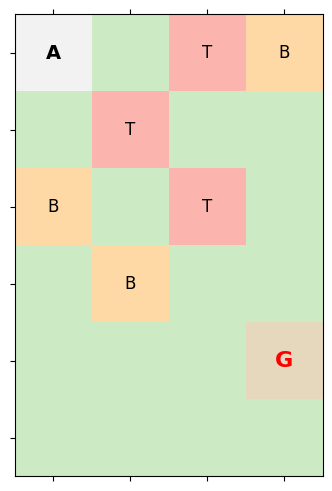

Step: 1
Action Taken: 1 (Down)
Agent Position: [1, 0]
Reward: -1
Terminated: False
Truncated: False



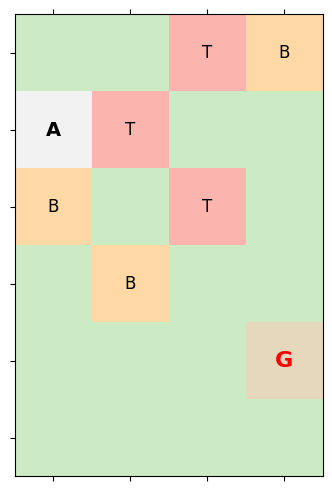

Step: 2
Action Taken: 3 (Right)
Agent Position: [1, 1]
Reward: -10
Terminated: False
Truncated: False



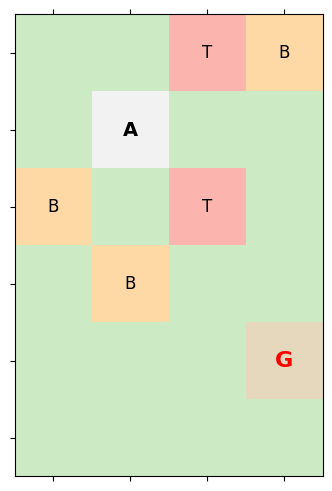

Step: 3
Action Taken: 3 (Right)
Agent Position: [1, 2]
Reward: -1
Terminated: False
Truncated: False



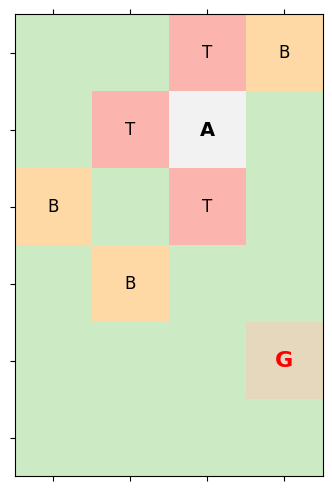

Step: 4
Action Taken: 1 (Down)
Agent Position: [2, 2]
Reward: -10
Terminated: False
Truncated: False



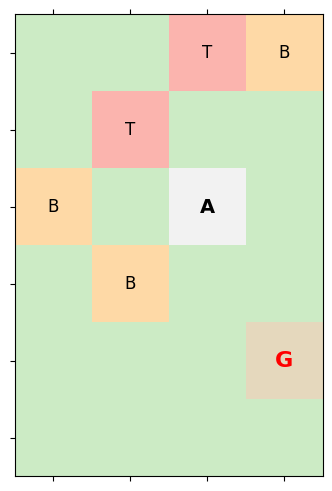

Step: 5
Action Taken: 1 (Down)
Agent Position: [3, 2]
Reward: -1
Terminated: False
Truncated: False



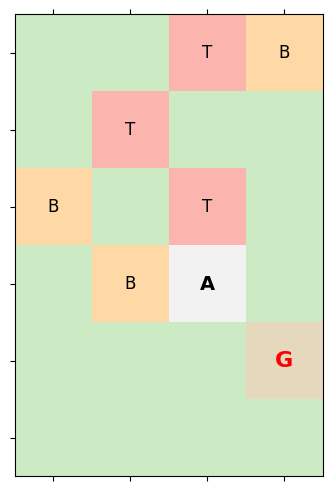

Step: 6
Action Taken: 2 (Left)
Agent Position: [3, 1]
Reward: 5
Terminated: False
Truncated: False



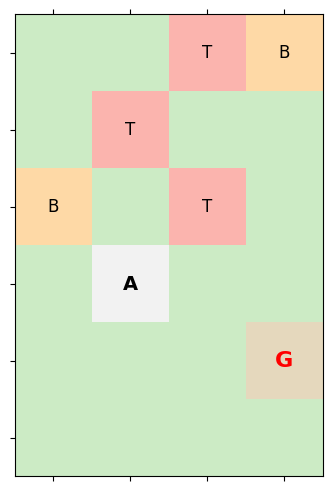

Step: 7
Action Taken: 3 (Right)
Agent Position: [3, 2]
Reward: -1
Terminated: False
Truncated: False



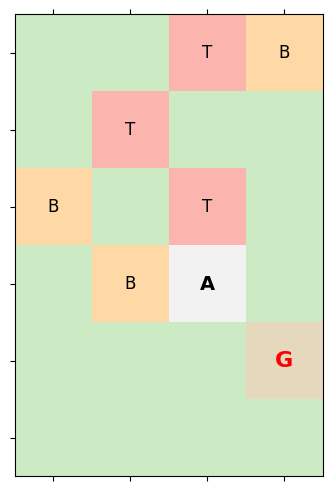

Step: 8
Action Taken: 2 (Left)
Agent Position: [3, 1]
Reward: 5
Terminated: False
Truncated: False



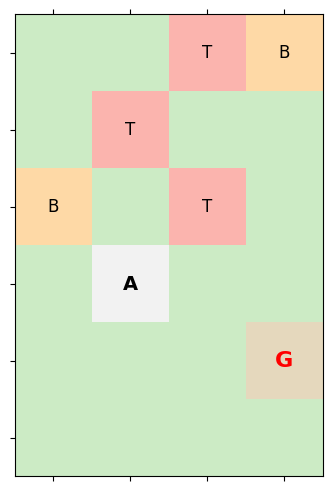

Step: 9
Action Taken: 0 (Up)
Agent Position: [2, 1]
Reward: -1
Terminated: False
Truncated: False



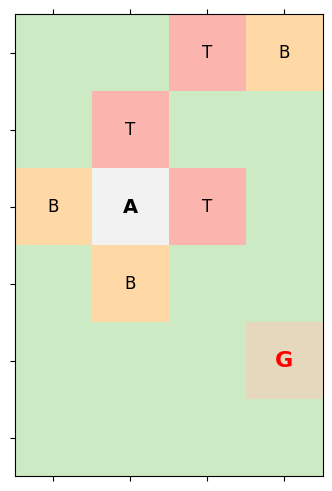

Step: 10
Action Taken: 3 (Right)
Agent Position: [2, 2]
Reward: -10
Terminated: False
Truncated: False



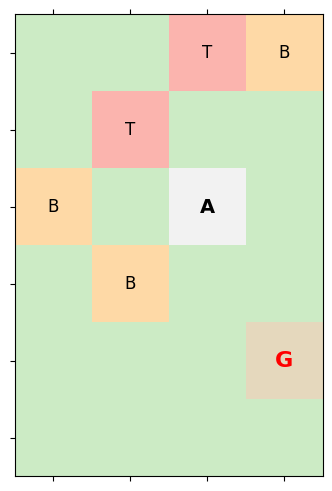

In [62]:
# PART 1: Running a random agent for at least 10 timesteps to show that the environment logic is defined correctly.
MAX_TIMESTEPS = 100

class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)


def test_random_agent():
    env = YavarEnv()
    agent = RandomAgent(env)

    # Reset environment
    observation, info = env.reset()
    print("RENDERING THE INITIAL OBSERVATIONS")
    print()
    env.render()

    terminated, truncated = False, False
    step_count = 1

    while step_count <= 10:  # Run for at least 10 timesteps as per assignments requirement
        action = agent.step(observation)
        obs, rew, terminated, truncated, info = env.step(action)

        # Print step information
        print(f"Step: {step_count}")
        print(f"Action Taken: {action} ({['Up', 'Down', 'Left', 'Right'][action]})")
        print(f"Agent Position: {env.agent_pos}")
        print(f"Reward: {rew}")
        print(f"Terminated: {terminated}")
        print(f"Truncated: {truncated}\n")

        # Render the current grid
        env.render()

        if terminated or truncated:
            break

        step_count += 1


test_random_agent()


In [63]:
# ASSIGNMENT 3 - PART 2 - SARSA

# Hyperparameters
ALPHA = 0.5
GAMMA = 0.9
EPSILON = 0.7
EPSILON_DECAY = 0.997
NUM_EPISODES = 500
GREEDY_EVAL_EPISODES = 10
MAX_TIMESTEPS = 50

class Sarsa:
    def __init__(self, env):
        self.env = env
        self.alpha = ALPHA
        self.gamma = GAMMA
        self.epsilon = EPSILON
        self.epsilon_decay = EPSILON_DECAY
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample() # Exploration
        else:
            return np.argmax(self.q_table[state]) # Exploitation

    # SARSA Update Rule
    def update(self, state, action, reward, next_state, next_action):
        td_target = reward + self.gamma * self.q_table[next_state][next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error

    def train(self):
        total_rewards = []
        epsilon_values = []

        for episode in range(NUM_EPISODES):
            total_reward = 0
            state, _ = self.env.reset()
            state = np.argmax(state)
            action = self.choose_action(state)

            while True:
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_state = np.argmax(next_state)
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)

                state, action = next_state, next_action
                total_reward += reward

                if terminated or truncated:
                    break

            self.epsilon = max(0.01, self.epsilon * self.epsilon_decay)
            total_rewards.append(total_reward)
            epsilon_values.append(self.epsilon)


        return total_rewards, epsilon_values

    def greedy_policy_evaluation(self):
        rewards = []

        for _ in range(GREEDY_EVAL_EPISODES):
            state, _ = self.env.reset()
            state = np.argmax(state)
            total_reward = 0

            while True:
                action = np.argmax(self.q_table[state])
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_state = np.argmax(next_state)
                total_reward += reward

                if terminated or truncated:
                    break

                state = next_state

            rewards.append(total_reward)

        return rewards

In [64]:
def plot_rewards(rewards, title=None):
    plt.figure()
    plt.plot(rewards)
    if title:
        plt.title(title)
    else:
        plt.title("Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()


def plot_epsilon_decay(epsilon_values, title=None):
    plt.figure()
    plt.plot(epsilon_values)
    if title:
        plt.title(title)
    else:
        plt.title("Epsilon Decay")
    plt.xlabel("Episode")
    plt.ylabel("Epsilon Value")
    plt.show()


def plot_greedy_rewards(greedy_rewards, title=None):
    plt.figure()
    plt.plot(greedy_rewards)
    if title:
        plt.title(title)
    else:
        plt.title("Greedy Policy Total Rewards")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

# I didnt use this funciton in this implementation, but it can be used to visualize agents movement in the grid world
def visualize_agent(env, q_table):
    state, _ = env.reset()
    state = np.argmax(state)
    total_reward = 0

    while True:
        env.render()
        action = np.argmax(q_table[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = np.argmax(next_state)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Total reward: {total_reward}")



In [65]:
!pip install optuna
import optuna

In [66]:
def objective(trial):

    gamma = trial.suggest_categorical("gamma", [0.85, 0.9, 0.95])
    epsilon_decay = trial.suggest_categorical("epsilon_decay", [0.97, 0.98, 0.99])
    epsilon = trial.suggest_float("epsilon", 0.5, 1.0, step=0.1)
    num_episodes = trial.suggest_int("num_episodes", 500, 1000, step=500)
    max_timesteps = trial.suggest_int("max_timesteps", 50, 100, step=50)

    env = YavarEnv()
    agent = Sarsa(env)
    agent.gamma = gamma
    agent.epsilon = epsilon
    agent.epsilon_decay = epsilon_decay

    # Updating the global hyperparameters for the agent
    global NUM_EPISODES, MAX_TIMESTEPS
    NUM_EPISODES = num_episodes
    MAX_TIMESTEPS = max_timesteps

    # Training the SARSA agent
    rewards, _ = agent.train()

    # Returning the average reward from the last 100 episodes
    return np.mean(rewards[-100:])

def tune_hyperparameters():
    print("Starting hyperparameter tuning with Optuna\n")

    # Creating a study to maximize the average reward
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20)  # Running for 20 trials

    print("\nBest hyperparameters found:")
    print(study.best_params)
    print(f"Best reward: {study.best_value}")

    return study.best_params

Training SARSA agent (Before Hyperparameter Tuning)

Initial Q-Table (Before Training):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Trained Q-Table (Without Hyperparameter Tuning):
[[ 36.92654091  52.9275557   37.22295745  36.31560998]
 [ 16.50790277  23.7553777   41.27636478  16.67592496]
 [-12.17632048   9.82664788  11.02041884  35.14936456]
 [  5.29118446  44.57159681   0.93340331  14.11911294]
 [ 34.82017484  59.9650761   45.33350426  45.04225453]
 [ 10.85880305  51.23221864  44.78493648  21.3862714 ]
 [ -9.46789813  33.24871236   9.58619406  47.3771163 ]
 [  4.47991053  67.30412063  23.75255676  46.57530073]
 [ 42.55740321  49.78229486  53.814112    62.2065857 ]
 [ 33

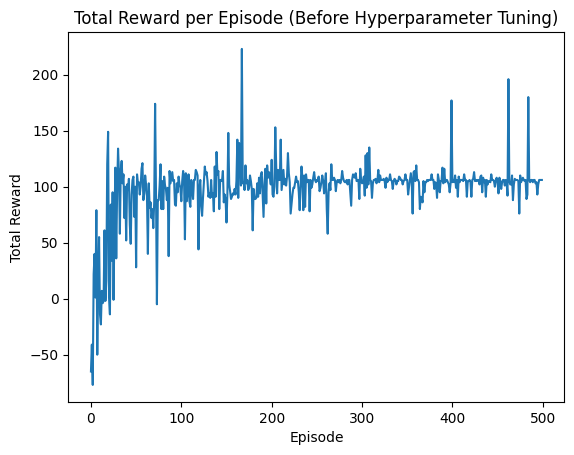


Epsilon Decay (Before Hyperparameter Tuning)



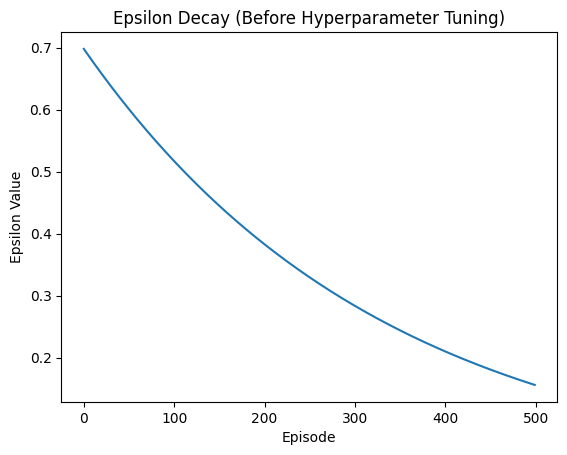

Greedy Policy Evaluation (Before Hyperparameter Tuning)



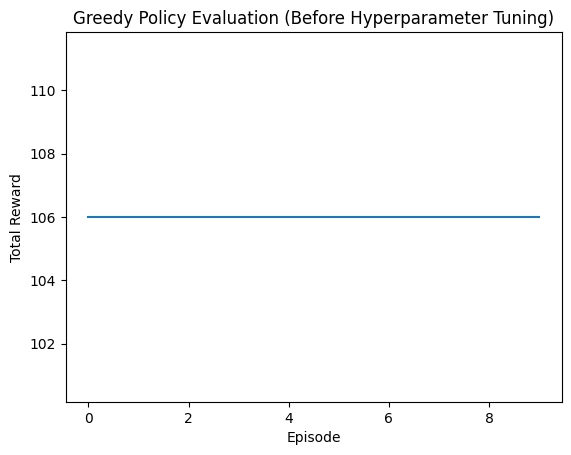

[I 2024-12-07 03:52:54,439] A new study created in memory with name: no-name-3a94b764-ebe1-4b85-8a91-656e1f557987



Starting hyperparameter tuning with Optuna



[I 2024-12-07 03:52:54,691] Trial 0 finished with value: 105.94 and parameters: {'gamma': 0.9, 'epsilon_decay': 0.99, 'epsilon': 0.5, 'num_episodes': 1000, 'max_timesteps': 50}. Best is trial 0 with value: 105.94.
[I 2024-12-07 03:52:54,896] Trial 1 finished with value: 106.05 and parameters: {'gamma': 0.85, 'epsilon_decay': 0.99, 'epsilon': 0.6, 'num_episodes': 500, 'max_timesteps': 50}. Best is trial 1 with value: 106.05.
[I 2024-12-07 03:52:55,032] Trial 2 finished with value: 106.12 and parameters: {'gamma': 0.9, 'epsilon_decay': 0.99, 'epsilon': 1.0, 'num_episodes': 500, 'max_timesteps': 100}. Best is trial 2 with value: 106.12.
[I 2024-12-07 03:52:57,773] Trial 3 finished with value: 489.02 and parameters: {'gamma': 0.85, 'epsilon_decay': 0.97, 'epsilon': 0.5, 'num_episodes': 1000, 'max_timesteps': 50}. Best is trial 3 with value: 489.02.
[I 2024-12-07 03:52:58,948] Trial 4 finished with value: 241.48 and parameters: {'gamma': 0.85, 'epsilon_decay': 0.97, 'epsilon': 0.5, 'num_epi


Best hyperparameters found:
{'gamma': 0.85, 'epsilon_decay': 0.97, 'epsilon': 0.5, 'num_episodes': 1000, 'max_timesteps': 50}
Best reward: 489.02


Training SARSA agent (After Hyperparameter Tuning)

Trained Q-Table (After Hyperparameter Tuning):
[[12.93031041 26.78976451 12.78419117 13.56871598]
 [-0.68473535 -7.5        20.803919   -5.        ]
 [-5.          4.12171912  0.         10.40929403]
 [ 8.12980179  6.73265745 -0.41833001  9.67671804]
 [17.90622658 32.06208665 25.70847293  9.9293786 ]
 [-1.80617877  4.97373427 26.4419713  -1.26387287]
 [-0.7162912  -5.          0.          5.22795251]
 [12.86813478  0.          2.40494274  7.44213425]
 [27.10151522 24.17899575 30.53481274 24.66868062]
 [-5.10916132 18.27855249 29.55040944 -8.52734   ]
 [-0.5        -0.5         4.36731053 -0.5       ]
 [ 4.27967919  0.          0.          0.        ]
 [29.5988071  15.29300087 19.53492817 16.65969538]
 [23.16998512  2.36101833 10.26695172  9.62719894]
 [-5.         -0.75       10.51260721 

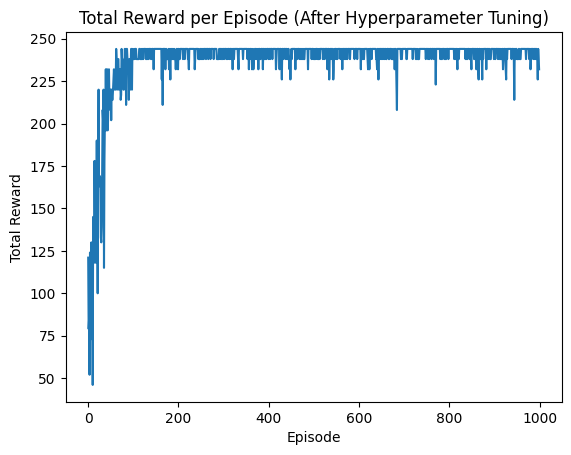

Epsilon Decay (After Hyperparameter Tuning)



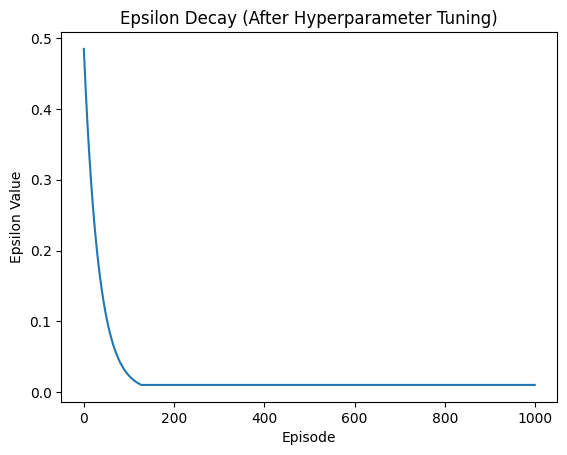

Greedy Policy Evaluation (After Hyperparameter Tuning)



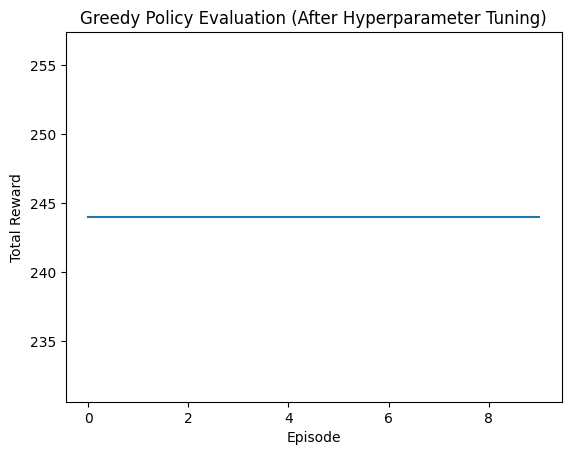

In [67]:
def main():
    # Training SARSA without hyperparameter tuning
    print("Training SARSA agent (Before Hyperparameter Tuning)")
    env = YavarEnv()
    agent = Sarsa(env)

    # Printing initial Q-table before training
    print("\nInitial Q-Table (Before Training):")
    print(agent.q_table)
    print()

    # Training the agent and collecting results
    rewards, epsilon_values = agent.train()

    # Printing the Q-table after training without tuning
    print("\nTrained Q-Table (Without Hyperparameter Tuning):")
    print(agent.q_table)
    print()

    # Plotting results before hyperparameter tuning
    print("Total Reward per Episode (Before Hyperparameter Tuning)")
    print()
    plot_rewards(rewards, title="Total Reward per Episode (Before Hyperparameter Tuning)")
    print()
    print("Epsilon Decay (Before Hyperparameter Tuning)")
    print()
    plot_epsilon_decay(epsilon_values, title="Epsilon Decay (Before Hyperparameter Tuning)")
    print("Greedy Policy Evaluation (Before Hyperparameter Tuning)")
    print()
    greedy_rewards = agent.greedy_policy_evaluation()
    plot_greedy_rewards(greedy_rewards, title="Greedy Policy Evaluation (Before Hyperparameter Tuning)")
    print()

    # hyperparameter tuning
    best_params = tune_hyperparameters()

    # Training SARSA with the best parameters from Optuna
    print()
    print("\nTraining SARSA agent (After Hyperparameter Tuning)")
    agent = Sarsa(env)
    agent.gamma = best_params["gamma"]
    agent.epsilon_decay = best_params["epsilon_decay"]
    agent.epsilon = best_params["epsilon"]
    NUM_EPISODES = best_params["num_episodes"]
    MAX_TIMESTEPS = best_params["max_timesteps"]

    # Training the agent again with tuned hyperparameters
    rewards, epsilon_values = agent.train()

    # Printing the Q-table after training with tuning
    print("\nTrained Q-Table (After Hyperparameter Tuning):")
    print(agent.q_table)
    print()

    # Plotting results after hyperparameter tuning
    print("Total Reward per Episode (After Hyperparameter Tuning)")
    print()
    plot_rewards(rewards, title="Total Reward per Episode (After Hyperparameter Tuning)")
    print("Epsilon Decay (After Hyperparameter Tuning)")
    print()
    plot_epsilon_decay(epsilon_values, title="Epsilon Decay (After Hyperparameter Tuning)")
    print("Greedy Policy Evaluation (After Hyperparameter Tuning)")
    print()
    greedy_rewards = agent.greedy_policy_evaluation()
    plot_greedy_rewards(greedy_rewards, title="Greedy Policy Evaluation (After Hyperparameter Tuning)")
    print()


if __name__ == "__main__":
    main()

In [81]:
# PART3: n-step Double Q-Learning

# Global Hyperparameters
ALPHA = 0.5
GAMMA = 0.90
EPSILON = 0.6
EPSILON_DECAY = 0.98
MAX_TIMESTEPS = 50
NUM_EPISODES = 500
GREEDY_EVAL_EPISODES = 10


class NStepDoubleQLearning:
    def __init__(self, env, n=3):
        self.env = env
        self.n = n
        self.q1 = np.zeros((env.observation_space.n, env.action_space.n))
        self.q2 = np.zeros((env.observation_space.n, env.action_space.n))
        self.alpha = ALPHA
        self.gamma = GAMMA
        self.epsilon = EPSILON
        self.epsilon_decay = EPSILON_DECAY
        self.max_timesteps = MAX_TIMESTEPS

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()  # Exploration
        else:
            q_sum = self.q1[state] + self.q2[state]
            return np.argmax(q_sum)  # Exploitation

    def update(self, states, actions, rewards):
        n = len(states) - 1
        G = 0
        for i in range(n-1, -1, -1):  # Compute G backwards
            G = rewards[i] + self.gamma * G

        next_state = states[-1]
        next_action = np.argmax(self.q1[next_state] + self.q2[next_state])

        if random.random() < 0.5:  # Update Q1
            G += self.gamma**n * self.q2[next_state, next_action]
            self.q1[states[0], actions[0]] += self.alpha * (G - self.q1[states[0], actions[0]])
        else:  # Update Q2
            G += self.gamma**n * self.q1[next_state, next_action]
            self.q2[states[0], actions[0]] += self.alpha * (G - self.q2[states[0], actions[0]])

    def train(self):
        total_rewards = []
        epsilon_values = []

        for episode in range(NUM_EPISODES):
            state, _ = self.env.reset()
            state = np.argmax(state)
            action = self.choose_action(state)

            states, actions, rewards = [state], [action], []
            total_reward = 0
            for t in range(self.max_timesteps):
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_state = np.argmax(next_state)
                total_reward += reward

                states.append(next_state)
                rewards.append(reward)

                if len(states) > self.n:
                    self.update(states, actions, rewards)
                    states.pop(0)
                    actions.pop(0)
                    rewards.pop(0)

                if terminated or truncated:
                    break

                action = self.choose_action(next_state)
                actions.append(action)

            total_rewards.append(total_reward)
            epsilon_values.append(self.epsilon)
            self.epsilon = max(0.01, self.epsilon * self.epsilon_decay)

        return total_rewards, epsilon_values

    def greedy_policy_evaluation(self):
        rewards = []
        for _ in range(GREEDY_EVAL_EPISODES):
            state, _ = self.env.reset()
            state = np.argmax(state)
            total_reward = 0
            while True:
                action = np.argmax(self.q1[state] + self.q2[state])
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_state = np.argmax(next_state)
                total_reward += reward
                if terminated or truncated:
                    break
                state = next_state
            rewards.append(total_reward)
        return rewards



In [82]:
# Plotting Functions
def plot_rewards(rewards, n, title="Rewards Per Episode"):
    plt.plot(rewards)
    plt.title(f"{title} for n={n}")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

def plot_epsilon_decay(epsilon_values, n, title="Epsilon Decay"):
    plt.plot(epsilon_values)
    plt.title(f"{title} for n={n}")
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.show()

def plot_greedy_rewards(greedy_rewards, n, title="Greedy Policy Rewards"):
    plt.plot(greedy_rewards)
    plt.title(f"{title} for n={n}")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()


Training n-Step Double Q-Learning Agent with n=1...

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[32.41312131 44.         37.56997831 32.93966055]
 [ 0.17093355  4.68404027 38.41069109  2.78886549]
 [-5.          0.          0.54593355 42.22629641]
 [46.07511431 26

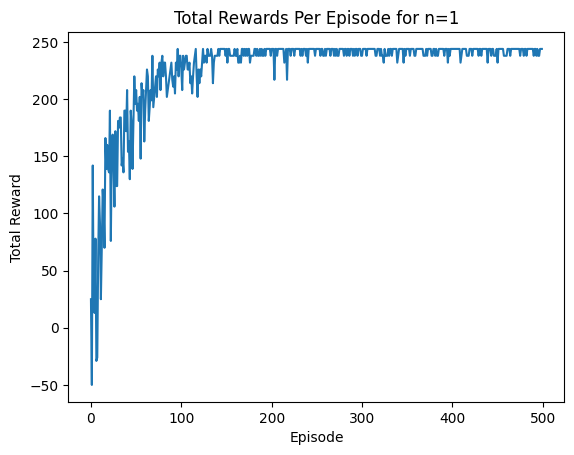

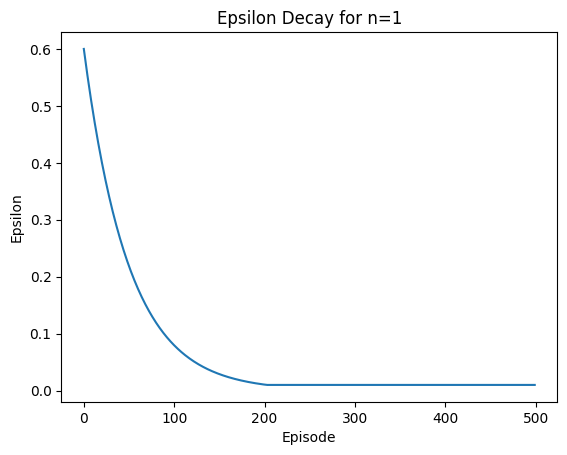

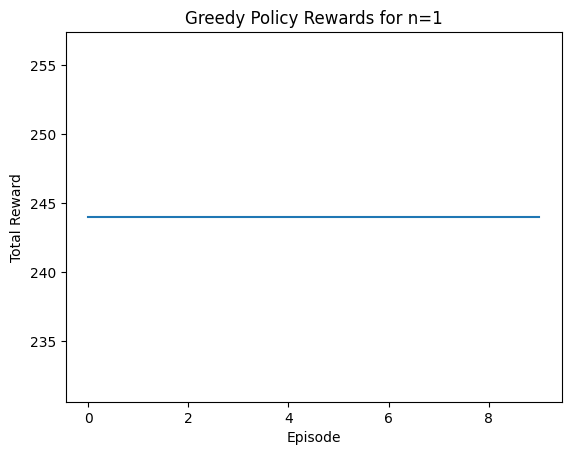

Training n-Step Double Q-Learning Agent with n=2...

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[34.91732113 43.95268159 32.89721888 22.50085823]
 [-1.80975    26.1269429  -0.95       -5.475     ]
 [ 0.         -1.92072113  0.          9.38670561]
 [30.25606604  6

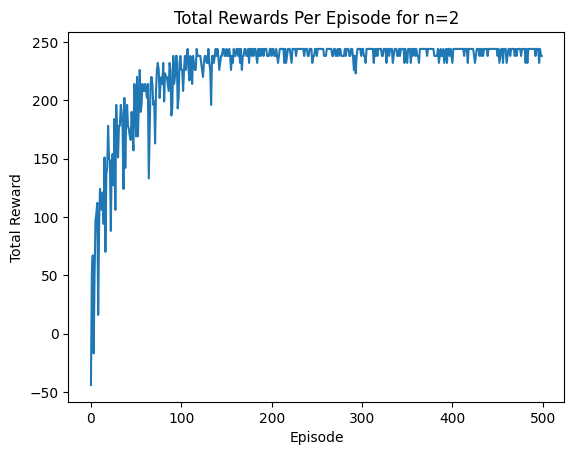

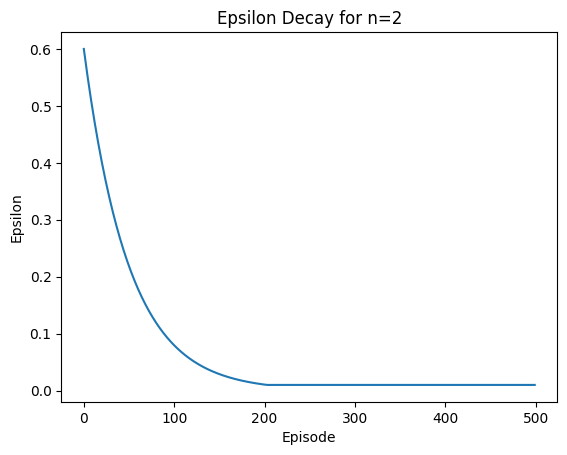

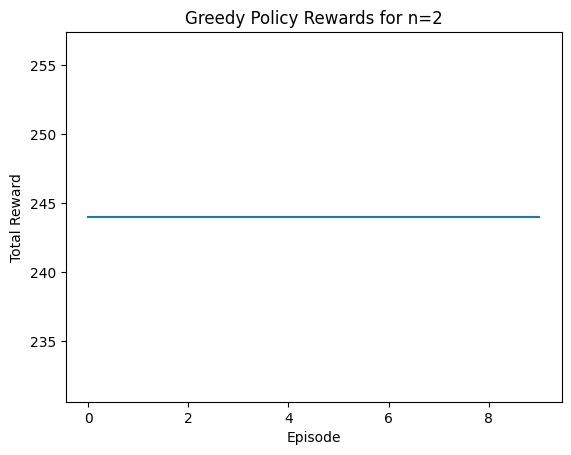

Training n-Step Double Q-Learning Agent with n=3...

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[ 2.26664170e+01  4.30477225e+01  3.10163540e+01  3.12702811e+01]
 [-1.67668937e+00  5.61269451e+00  3.45621252e+01 -1.44525000e+01]
 [-1.24275000e+01 -2.61282921e+00  

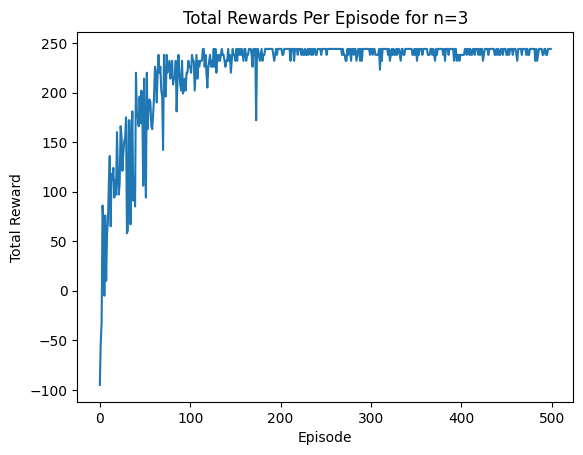

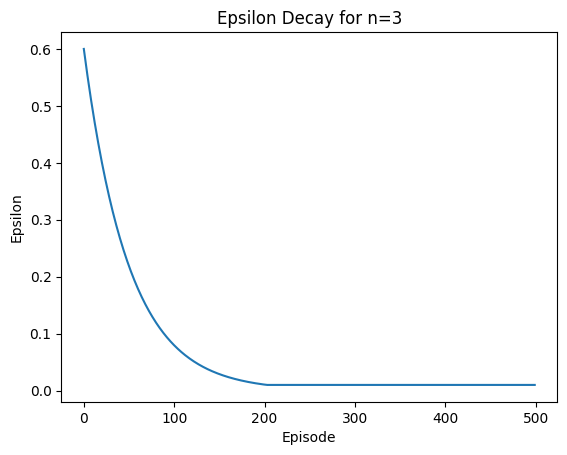

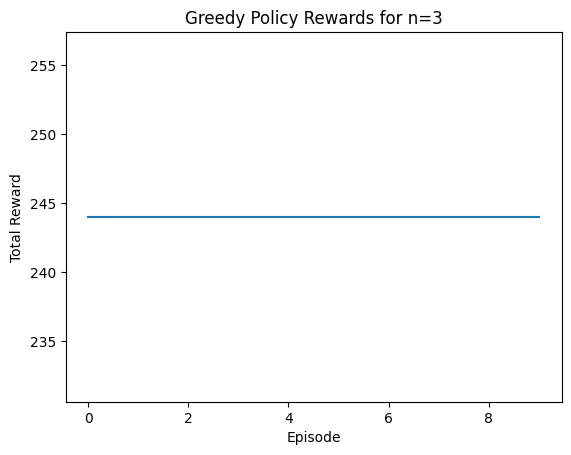

Training n-Step Double Q-Learning Agent with n=4...

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[28.55299281 43.66646574 26.95907423 24.48991256]
 [ 0.          0.82472685 34.81290524 -4.37      ]
 [ 1.50395589 -2.36527047 -1.14980723 19.53905695]
 [38.75454114 14

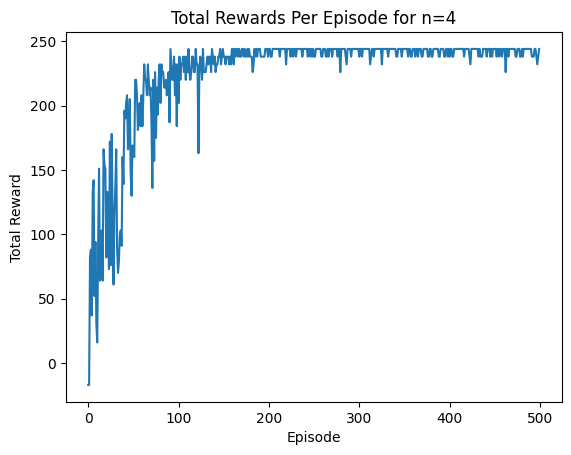

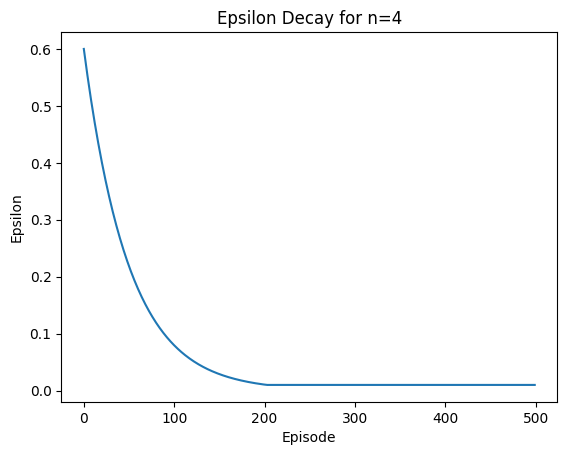

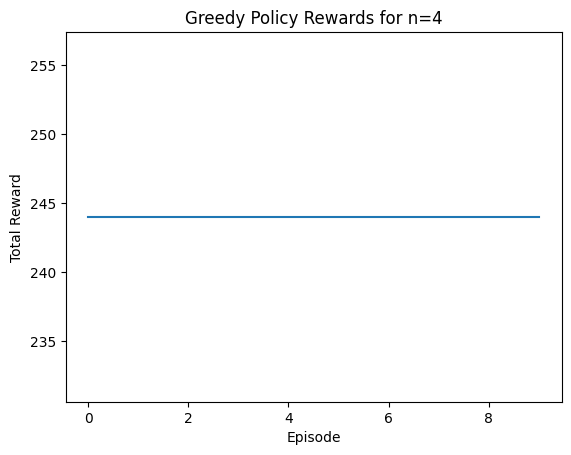

Training n-Step Double Q-Learning Agent with n=5...

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[ 25.03849532  43.40459429  32.92795747  21.5773679 ]
 [ -6.25974129   6.34892985  20.67174115   7.06145447]
 [-15.5745375   23.73135515   9.03202542  40.62828382]
 [ 4

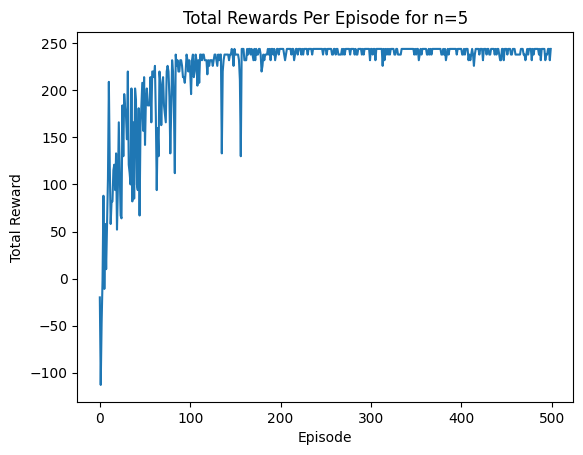

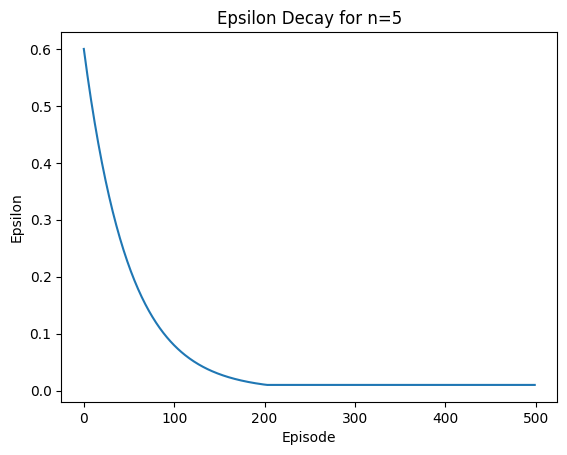

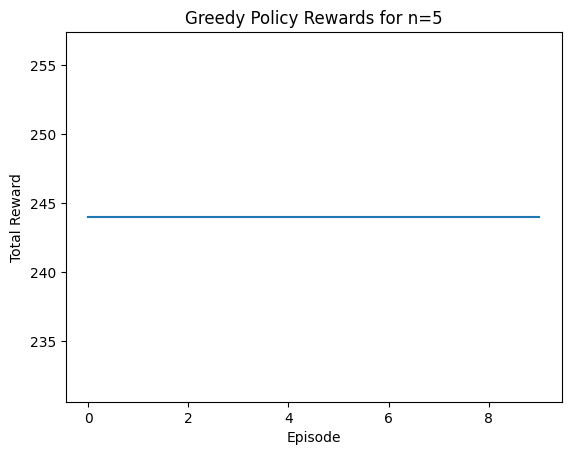

In [83]:
# Main Function
def main():
    env = YavarEnv()
    n_values = [1, 2, 3, 4, 5]

    for n in n_values:
        print(f"Training n-Step Double Q-Learning Agent with n={n}...")
        agent = NStepDoubleQLearning(env, n=n)

        print("\nInitial Q1 Table:")
        print(agent.q1)
        print("\nInitial Q2 Table:")
        print(agent.q2)

        # Train the agent
        rewards, epsilon_values = agent.train()

        print("\nTrained Q1 Table:")
        print(agent.q1)
        print("\nTrained Q2 Table:")
        print(agent.q2)

        # Plot total rewards and epsilon decay
        plot_rewards(rewards, n, title="Total Rewards Per Episode")
        plot_epsilon_decay(epsilon_values, n, title="Epsilon Decay")

        # Evaluate greedy policy
        greedy_rewards = agent.greedy_policy_evaluation()
        plot_greedy_rewards(greedy_rewards, n, title="Greedy Policy Rewards")

if __name__ == "__main__":
    main()


[I 2024-12-07 04:11:55,693] A new study created in memory with name: no-name-0ba43c3d-a3a8-47b0-89f2-6ff020f061f0



Starting Hyperparameter Tuning with Optuna for Different n Values...


[I 2024-12-07 04:11:56,114] Trial 0 finished with value: 244.0 and parameters: {'n': 3, 'alpha': 0.6, 'gamma': 0.8500000000000001, 'epsilon': 0.1, 'epsilon_decay': 0.96}. Best is trial 0 with value: 244.0.
[I 2024-12-07 04:11:56,536] Trial 1 finished with value: 244.0 and parameters: {'n': 2, 'alpha': 0.1, 'gamma': 0.6, 'epsilon': 0.5, 'epsilon_decay': 0.9}. Best is trial 0 with value: 244.0.
[I 2024-12-07 04:11:56,953] Trial 2 finished with value: 244.0 and parameters: {'n': 5, 'alpha': 0.9, 'gamma': 0.7, 'epsilon': 0.9, 'epsilon_decay': 0.96}. Best is trial 0 with value: 244.0.
[I 2024-12-07 04:11:57,372] Trial 3 finished with value: 244.0 and parameters: {'n': 4, 'alpha': 0.30000000000000004, 'gamma': 0.5, 'epsilon': 0.4, 'epsilon_decay': 0.9}. Best is trial 0 with value: 244.0.
[I 2024-12-07 04:11:57,799] Trial 4 finished with value: 244.0 and parameters: {'n': 4, 'alpha': 0.5, 'gamma': 0.75, 'epsilon': 0.4, 'epsilon_decay': 0.9}. Best is trial 0 with value: 244.0.
[I 2024-12-07 04


Best Hyperparameters:
{'n': 3, 'alpha': 0.6, 'gamma': 0.8500000000000001, 'epsilon': 0.1, 'epsilon_decay': 0.96}

Best Reward Achieved:
244.0

Best Configuration:
{'n': 3, 'alpha': 0.6, 'gamma': 0.8500000000000001, 'epsilon': 0.1, 'epsilon_decay': 0.96}
Best Average Greedy Reward: 244.0

Plotting results for the best hyperparameters:


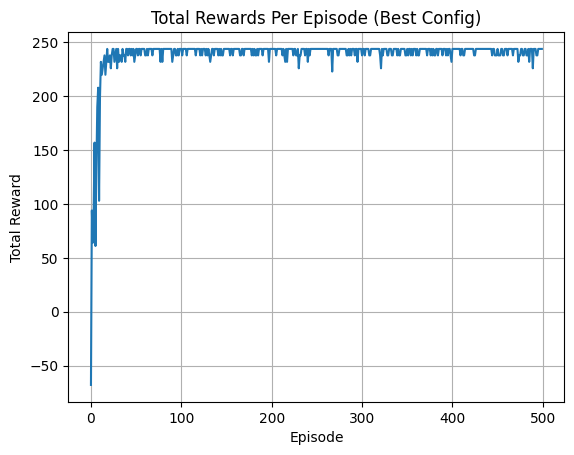

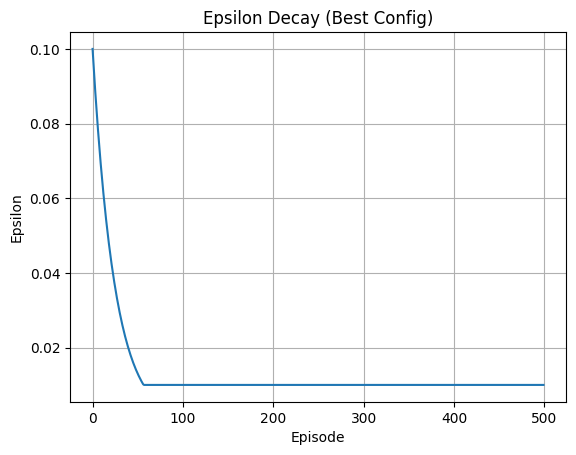

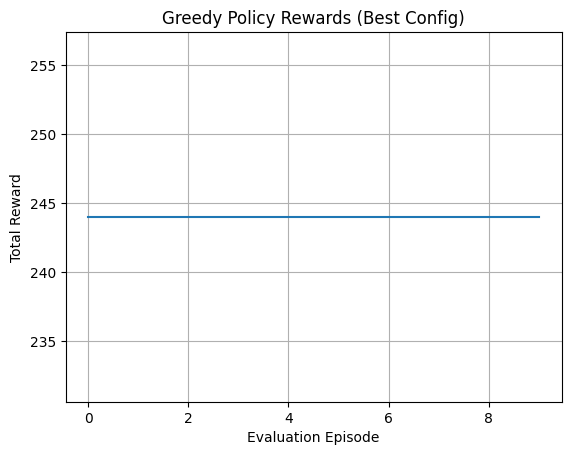

In [76]:
import optuna

# Define an objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    n = trial.suggest_int("n", 1, 5)  # Values of n
    alpha = trial.suggest_float("alpha", 0.1, 0.9, step=0.1)
    gamma = trial.suggest_float("gamma", 0.5, 0.99, step=0.05)
    epsilon = trial.suggest_float("epsilon", 0.1, 0.9, step=0.1)
    epsilon_decay = trial.suggest_float("epsilon_decay", 0.90, 0.99, step=0.01)

    # Create a new instance of the environment
    env = YavarEnv()
    agent = NStepDoubleQLearning(env, n=n)

    # Update agent hyperparameters
    agent.alpha = alpha
    agent.gamma = gamma
    agent.epsilon = epsilon
    agent.epsilon_decay = epsilon_decay

    # Train the agent
    rewards, epsilon_values = agent.train()

    # Evaluate greedy policy rewards
    greedy_rewards = agent.greedy_policy_evaluation()

    # Save the best results globally for plotting (only if it improves)
    global best_rewards, best_epsilon_values, best_greedy_rewards, best_trial
    if sum(greedy_rewards) / len(greedy_rewards) > best_trial["reward"]:
        best_trial["reward"] = sum(greedy_rewards) / len(greedy_rewards)
        best_trial["params"] = {
            "n": n,
            "alpha": alpha,
            "gamma": gamma,
            "epsilon": epsilon,
            "epsilon_decay": epsilon_decay,
        }
        best_rewards = rewards
        best_epsilon_values = epsilon_values
        best_greedy_rewards = greedy_rewards

    # Return the mean greedy reward as the objective value
    return sum(greedy_rewards) / len(greedy_rewards)

# Hyperparameter tuning using Optuna
def tune_hyperparameters(num_trials=50):
    global best_rewards, best_epsilon_values, best_greedy_rewards, best_trial
    best_rewards = []
    best_epsilon_values = []
    best_greedy_rewards = []
    best_trial = {"reward": -float("inf"), "params": None}

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=num_trials)

    print("\nBest Hyperparameters:")
    print(study.best_params)

    print("\nBest Reward Achieved:")
    print(study.best_value)

    return study

# Plotting Functions
def plot_rewards(rewards, title="Rewards Per Episode"):
    plt.figure()
    plt.plot(rewards)
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid()
    plt.show()

def plot_epsilon_decay(epsilon_values, title="Epsilon Decay"):
    plt.figure()
    plt.plot(epsilon_values)
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.grid()
    plt.show()

def plot_greedy_rewards(greedy_rewards, title="Greedy Policy Rewards"):
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(title)
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Total Reward")
    plt.grid()
    plt.show()

# Main function for Optuna tuning
if __name__ == "__main__":
    print("\nStarting Hyperparameter Tuning with Optuna for Different n Values...")
    study = tune_hyperparameters(num_trials=100)

    # Display the best results
    print("\nBest Configuration:")
    print(best_trial["params"])
    print(f"Best Average Greedy Reward: {best_trial['reward']}")

    # Plot the results of the best hyperparameters
    print("\nPlotting results for the best hyperparameters:")
    plot_rewards(best_rewards, title="Total Rewards Per Episode (Best Config)")
    plot_epsilon_decay(best_epsilon_values, title="Epsilon Decay (Best Config)")
    plot_greedy_rewards(best_greedy_rewards, title="Greedy Policy Rewards (Best Config)")



Comparing SARSA vs. n-Step Double Q-Learning...

Training SARSA Agent...
SARSA Training Complete.

Training n-Step Double Q-Learning Agent with n=3...
n-Step Double Q-Learning Training Complete.


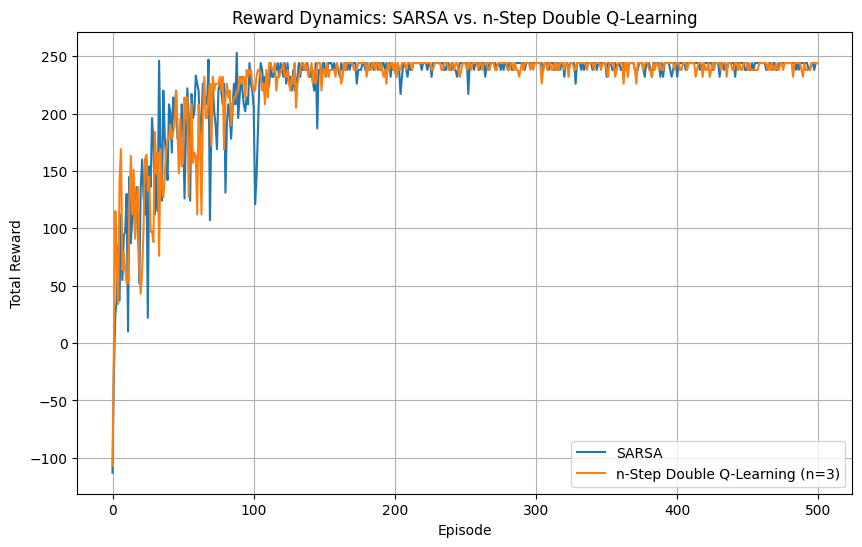


--- Final Outputs ---
Optimal n-Step Value: 3

SARSA Rewards (Last 10 Episodes):
[244, 244, 244, 238, 238, 244, 244, 238, 244, 244]

n-Step Double Q-Learning Rewards (Last 10 Episodes):
[244, 238, 238, 238, 238, 244, 244, 244, 244, 244]


In [85]:
def compare_sarsa_vs_double_q(env, optimal_n):

    # Train SARSA
    print("\nTraining SARSA Agent...")
    sarsa_agent = Sarsa(env)
    sarsa_rewards, _ = sarsa_agent.train()
    print("SARSA Training Complete.")

    # Train n-step Double Q-Learning with optimal n
    print(f"\nTraining n-Step Double Q-Learning Agent with n={optimal_n}...")
    double_q_agent = NStepDoubleQLearning(env, n=optimal_n)
    double_q_rewards, _ = double_q_agent.train()
    print("n-Step Double Q-Learning Training Complete.")

    # Plot Reward Dynamics Comparison
    plt.figure(figsize=(10, 6))
    plt.plot(sarsa_rewards, label="SARSA")
    plt.plot(double_q_rewards, label=f"n-Step Double Q-Learning (n={optimal_n})")
    plt.title("Reward Dynamics: SARSA vs. n-Step Double Q-Learning")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.legend()
    plt.grid()
    plt.show()

    return sarsa_rewards, double_q_rewards


def main():
    env = YavarEnv()
    optimal_n = 3

    # Comparing SARSA vs. n-step Double Q-Learning
    print("\nComparing SARSA vs. n-Step Double Q-Learning...")
    sarsa_rewards, double_q_rewards = compare_sarsa_vs_double_q(env, optimal_n)

    # Final Outputs
    print("\n--- Final Outputs ---")
    print(f"Optimal n-Step Value: {optimal_n}")
    print("\nSARSA Rewards (Last 10 Episodes):")
    print(sarsa_rewards[-10:])
    print("\nn-Step Double Q-Learning Rewards (Last 10 Episodes):")
    print(double_q_rewards[-10:])


if __name__ == "__main__":
    main()
